In [4]:
# PYTHON MODULES
# import user-installed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# pandas options
pd.set_option('display.max_rows', 100)

In [5]:
!wget "https://raw.githubusercontent.com/bengranat/ITP487_NBAStats_Granat/main/nba_game_log_2021_22.csv"

nba_player_log = pd.read_csv('nba_game_log_2021_22.csv')

!wget "https://raw.githubusercontent.com/bengranat/ITP487_NBAStats_Granat/main/nba_salary_2021_22.csv"

nba_player_salary = pd.read_csv('nba_salary_2021_22.csv')

--2022-12-08 02:09:13--  https://raw.githubusercontent.com/bengranat/ITP487_NBAStats_Granat/main/nba_game_log_2021_22.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13427331 (13M) [text/plain]
Saving to: ‘nba_game_log_2021_22.csv’

nba_game_log_2021_2 100%[===================>]  12.80M  --.-KB/s    in 0.1s    

2022-12-08 02:09:14 (107 MB/s) - ‘nba_game_log_2021_22.csv’ saved [13427331/13427331]

--2022-12-08 02:09:14--  https://raw.githubusercontent.com/bengranat/ITP487_NBAStats_Granat/main/nba_salary_2021_22.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent,

In [6]:
print(nba_player_log.columns)
print(nba_player_log.info())
print(nba_player_salary.columns)
print(nba_player_salary.info())

Index(['game_id', 'game_date', 'OT', 'H_A', 'Team_Abbrev', 'Team_Score',
       'Team_pace', 'Team_efg_pct', 'Team_tov_pct', 'Team_orb_pct',
       'Team_ft_rate', 'Team_off_rtg', 'Inactives', 'Opponent_Abbrev',
       'Opponent_Score', 'Opponent_pace', 'Opponent_efg_pct',
       'Opponent_tov_pct', 'Opponent_orb_pct', 'Opponent_ft_rate',
       'Opponent_off_rtg', 'player', 'player_id', 'starter', 'mp', 'fg', 'fga',
       'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus',
       'did_not_play', 'is_inactive', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm',
       'season', 'minutes', 'double_double', 'triple_double', 'DKP', 'FDP',
       'SDP', 'DKP_per_minute', 'FDP_per_minute', 'SDP_per_minute',
       'pf_per_minute', 'ts', 'last_60_minutes_per_game_s

In [7]:
print("NBA player log shape:")
print(nba_player_log.shape)
print("NBA player salary shape:")
print(nba_player_salary.shape)

NBA player log shape:
(31608, 81)
NBA player salary shape:
(649, 7)


In [8]:
print(nba_player_log.head())
print("\n")






        game_id  game_date  OT H_A Team_Abbrev  Team_Score  Team_pace  \
0  202204100BRK  4/10/2022   0   A         IND         126      103.9   
1  202204100BRK  4/10/2022   0   A         IND         126      103.9   
2  202204100BRK  4/10/2022   0   A         IND         126      103.9   
3  202204100BRK  4/10/2022   0   A         IND         126      103.9   
4  202204100BRK  4/10/2022   0   A         IND         126      103.9   

   Team_efg_pct  Team_tov_pct  Team_orb_pct  ...  pf_per_minute     ts  \
0         0.543           5.9          20.8  ...       0.000000  14.44   
1         0.543           5.9          20.8  ...       0.083604  23.00   
2         0.543           5.9          20.8  ...       0.139730  21.76   
3         0.543           5.9          20.8  ...       0.156169   4.88   
4         0.543           5.9          20.8  ...       0.097192  15.88   

  last_60_minutes_per_game_starting last_60_minutes_per_game_bench    PG%  \
0                         36.176282    

In [9]:
print(nba_player_salary.head())
print("\n")

              Player   2021/22   2022/23   2023/24   2024/25   2025/26  \
0      Stephen Curry  45780966  48070014  51915615  55761217  59606817   
1          John Wall  44310840  47366760         0         0         0   
2       James Harden  44310840  47366760         0         0         0   
3  Russell Westbrook  44211146  47063478         0         0         0   
4       Kevin Durant  42018900  44119845  47649433  51179020  54708608   

   2026/27  
0        0  
1        0  
2        0  
3        0  
4        0  




In [10]:
top_scorer_df = nba_player_log[['game_id', 'game_date','H_A', 'Team_Abbrev','Opponent_Abbrev','player', 'pts','minutes']]
print(top_scorer_df.head())
 
print("Player log data: ")
print("Shape before dropping duplicates and unneeded columns: ")
print(nba_player_log.shape)
 
top_scorer_df = top_scorer_df.drop_duplicates()
 
print("Shape after dropping duplicates and unneeded columns: ")
print(top_scorer_df.shape)


        game_id  game_date H_A Team_Abbrev Opponent_Abbrev             player  \
0  202204100BRK  4/10/2022   A         IND             BRK  Tyrese Haliburton   
1  202204100BRK  4/10/2022   A         IND             BRK        Buddy Hield   
2  202204100BRK  4/10/2022   A         IND             BRK     Oshae Brissett   
3  202204100BRK  4/10/2022   A         IND             BRK     Isaiah Jackson   
4  202204100BRK  4/10/2022   A         IND             BRK     T.J. McConnell   

   pts    minutes  
0   17  39.466667  
1   21  35.883333  
2   28  35.783333  
3    7  32.016667  
4   14  30.866667  
Player log data: 
Shape before dropping duplicates and unneeded columns: 
(31608, 81)
Shape after dropping duplicates and unneeded columns: 
(31282, 8)


In [11]:
top_salary_df = nba_player_salary[['Player', '2021/22']]
print(top_salary_df.head())
 
print("Player log data: ")
print("Shape before dropping duplicates and unneeded columns: ")
print(nba_player_salary.shape)

top_salary_df = top_salary_df.drop_duplicates()
 
print("Shape after dropping duplicates and unneeded columns: ")
print(top_salary_df.shape)

              Player   2021/22
0      Stephen Curry  45780966
1          John Wall  44310840
2       James Harden  44310840
3  Russell Westbrook  44211146
4       Kevin Durant  42018900
Player log data: 
Shape before dropping duplicates and unneeded columns: 
(649, 7)
Shape after dropping duplicates and unneeded columns: 
(649, 2)


In [12]:
print(top_salary_df.head())
print(top_scorer_df.head())

              Player   2021/22
0      Stephen Curry  45780966
1          John Wall  44310840
2       James Harden  44310840
3  Russell Westbrook  44211146
4       Kevin Durant  42018900
        game_id  game_date H_A Team_Abbrev Opponent_Abbrev             player  \
0  202204100BRK  4/10/2022   A         IND             BRK  Tyrese Haliburton   
1  202204100BRK  4/10/2022   A         IND             BRK        Buddy Hield   
2  202204100BRK  4/10/2022   A         IND             BRK     Oshae Brissett   
3  202204100BRK  4/10/2022   A         IND             BRK     Isaiah Jackson   
4  202204100BRK  4/10/2022   A         IND             BRK     T.J. McConnell   

   pts    minutes  
0   17  39.466667  
1   21  35.883333  
2   28  35.783333  
3    7  32.016667  
4   14  30.866667  


In [13]:
player_stats_salaries = pd.merge(top_scorer_df, top_salary_df,how='left',left_on='player',right_on='Player')
print(player_stats_salaries.info)

<bound method DataFrame.info of             game_id   game_date H_A Team_Abbrev Opponent_Abbrev  \
0      202204100BRK   4/10/2022   A         IND             BRK   
1      202204100BRK   4/10/2022   A         IND             BRK   
2      202204100BRK   4/10/2022   A         IND             BRK   
3      202204100BRK   4/10/2022   A         IND             BRK   
4      202204100BRK   4/10/2022   A         IND             BRK   
...             ...         ...  ..         ...             ...   
31277  202201130NOP   1/13/2022   A         LAC             NOP   
31278  202201150SAS   1/15/2022   A         LAC             SAS   
31279  202112220SAC  12/22/2021   A         LAC             SAC   
31280  202112260LAC  12/26/2021   H         LAC             DEN   
31281  202112270LAC  12/27/2021   H         LAC             BRK   

                  player  pts    minutes             Player     2021/22  
0      Tyrese Haliburton   17  39.466667  Tyrese Haliburton   4023600.0  
1            Bu

In [14]:
print(player_stats_salaries.shape)

(31282, 10)


In [15]:
player_stats_salaries = player_stats_salaries.dropna(how='any')
player_stats_salaries = player_stats_salaries.rename(columns={"2021/22":"Salary", "H_A":"Home_Away"})
print(player_stats_salaries.info)
print(player_stats_salaries.shape)

<bound method DataFrame.info of             game_id   game_date Home_Away Team_Abbrev Opponent_Abbrev  \
0      202204100BRK   4/10/2022         A         IND             BRK   
1      202204100BRK   4/10/2022         A         IND             BRK   
2      202204100BRK   4/10/2022         A         IND             BRK   
3      202204100BRK   4/10/2022         A         IND             BRK   
5      202204100BRK   4/10/2022         A         IND             BRK   
...             ...         ...       ...         ...             ...   
31277  202201130NOP   1/13/2022         A         LAC             NOP   
31278  202201150SAS   1/15/2022         A         LAC             SAS   
31279  202112220SAC  12/22/2021         A         LAC             SAC   
31280  202112260LAC  12/26/2021         H         LAC             DEN   
31281  202112270LAC  12/27/2021         H         LAC             BRK   

                  player  pts    minutes             Player      Salary  
0      Tyrese Hal

In [16]:
# Histogram prep - need total points grouped by game_id
 
print(player_stats_salaries.head())
print('\n')
 
# store view in df named 'points_by_game_dist'
points_by_game_dist = player_stats_salaries.groupby(by=['game_id'], as_index=False).agg({'pts':'sum'})
print(points_by_game_dist.head())


        game_id  game_date Home_Away Team_Abbrev Opponent_Abbrev  \
0  202204100BRK  4/10/2022         A         IND             BRK   
1  202204100BRK  4/10/2022         A         IND             BRK   
2  202204100BRK  4/10/2022         A         IND             BRK   
3  202204100BRK  4/10/2022         A         IND             BRK   
5  202204100BRK  4/10/2022         A         IND             BRK   

              player  pts    minutes             Player      Salary  
0  Tyrese Haliburton   17  39.466667  Tyrese Haliburton   4023600.0  
1        Buddy Hield   21  35.883333        Buddy Hield  23073234.0  
2     Oshae Brissett   28  35.783333     Oshae Brissett   1701593.0  
3     Isaiah Jackson    7  32.016667     Isaiah Jackson   2451240.0  
5       Terry Taylor   10  23.616667       Terry Taylor    342984.0  


        game_id  pts
0  202110190LAL  230
1  202110190MIL  198
2  202110200CHO  206
3  202110200DET  182
4  202110200MEM  240


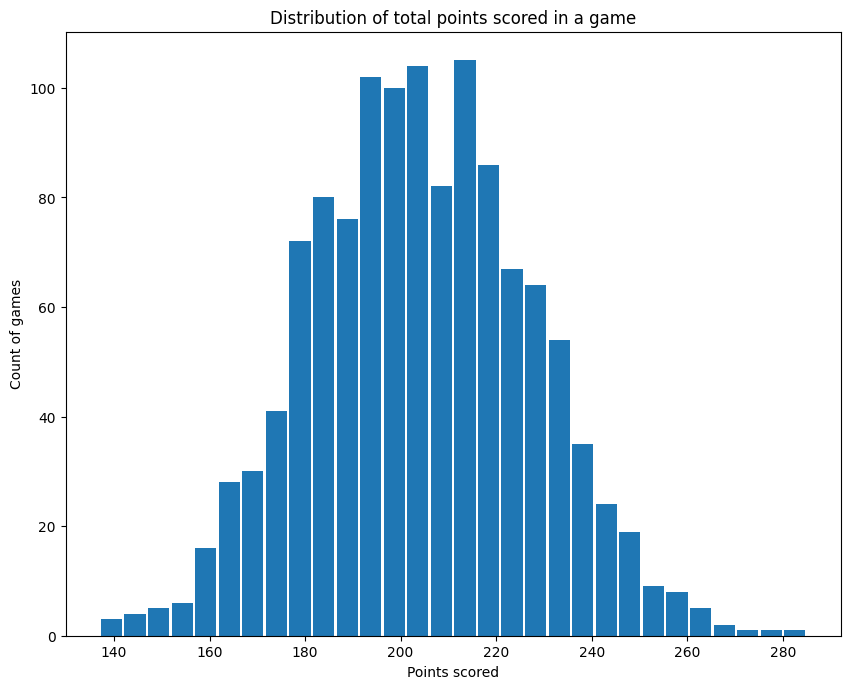

In [17]:
# Histogram
# sets size of figure
fig, ax = plt.subplots(figsize=(10,8), dpi=100)
ax.hist(x = points_by_game_dist['pts'], bins = 30, rwidth = .9)
# set title, and axis labels
plt.title(label='Distribution of total points scored in a game') 
plt.xlabel('Points scored')
plt.ylabel('Count of games')
# write code to create histogram here
 
plt.show()



In [20]:
# bar chart/horizontal bar chart prep
 
team_salary_breakdown = player_stats_salaries.groupby(by=['Player', 'Team_Abbrev'], as_index=False).agg({'Salary':'mean'})
 
# total team salary breakdown
total_team_salary = team_salary_breakdown.groupby(by=['Team_Abbrev'], as_index=False).agg({'Salary':'sum'})
total_team_salary['Salary'] = total_team_salary['Salary'].apply(lambda x: x*.000001)
total_team_salary = total_team_salary.sort_values(by=['Salary'], ascending=False)
 
print(total_team_salary.head())

   Team_Abbrev      Salary
2          BRK  223.581905
22         PHI  205.724357
29         WAS  180.507883
13         LAL  179.637341
24         POR  174.522078


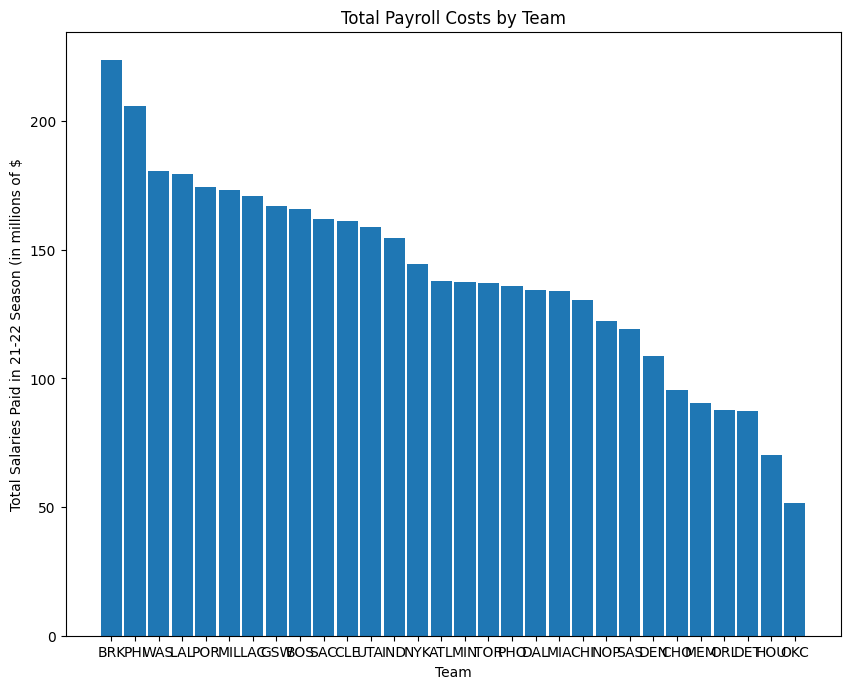

In [21]:
fig, ax = plt.subplots(figsize=(10,8), dpi=100)
ax.bar(x = total_team_salary.Team_Abbrev, height = total_team_salary.Salary, width = .9)
# set title, and axis labels
plt.title(label='Total Payroll Costs by Team') 
plt.xlabel('Team')
plt.ylabel('Total Salaries Paid in 21-22 Season (in millions of $')
# write code to create histogram here
 
plt.show()

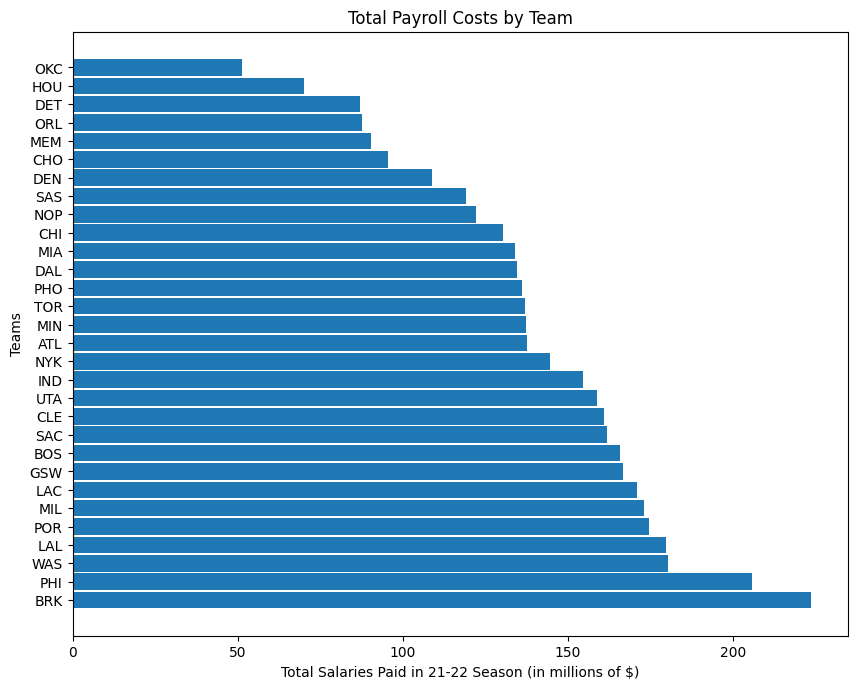

In [22]:
fig, ax = plt.subplots(figsize=(10,8), dpi=100)
ax.barh(y = total_team_salary.Team_Abbrev, width = total_team_salary.Salary, height = .9)
# set title, and axis labels
plt.title(label='Total Payroll Costs by Team') 
plt.xlabel('Total Salaries Paid in 21-22 Season (in millions of $)')
plt.ylabel('Teams')
# write code to create histogram here
 
plt.show()

In [23]:
# Pie Chart prep
 
# player, team, salary breakdown
team_salary_breakdown = player_stats_salaries.groupby(by=['Player', 'Team_Abbrev'], as_index=False).agg({'Salary':'mean'})
print(team_salary_breakdown.head())
 
team_salary_breakdown = team_salary_breakdown[team_salary_breakdown['Team_Abbrev'] == 'LAL'].sort_values(by='Salary', ascending=False)
team_salary_breakdown['top_players'] = team_salary_breakdown['Player'].apply(lambda x:
                                                                             'Russell Westbrook' if x=='Russell Westbrook' else
                                                                         'LeBron James' if x=='LeBron James' else
                                                                             'Anthony Davis' if x== 'Anthony Davis' else
                                                                             'DeAndre Jordan' if x== 'DeAndre Jordan' else
                                                                             'Talen Horton-Tucker' if x== 'Talen Horton-Tucker' else
                                                                             'Rajon Rondo' if x== 'Rajon Rondo' else 'Other Players')
 
LAL_top_salaries = team_salary_breakdown.groupby(by=['top_players'], as_index=False).agg({'Salary':'sum'}).sort_values(by='Salary', ascending=False)
 
print(LAL_top_salaries)
 
 


          Player Team_Abbrev      Salary
0   Aaron Gordon         DEN  16409091.0
1    Aaron Henry         PHI    223338.0
2  Aaron Holiday         PHO   3980551.0
3  Aaron Holiday         WAS   3980551.0
4  Aaron Nesmith         BOS   3631200.0
           top_players      Salary
5    Russell Westbrook  44211146.0
2         LeBron James  41180544.0
0        Anthony Davis  35361360.0
3        Other Players  30774964.0
1       DeAndre Jordan  11109327.0
6  Talen Horton-Tucker   9500000.0
4          Rajon Rondo   7500000.0


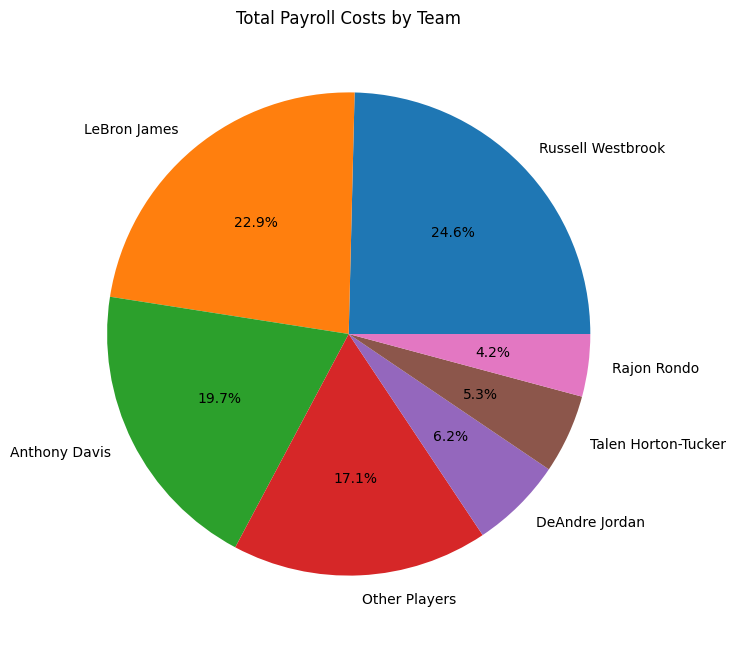

In [24]:
fig, ax = plt.subplots(figsize=(14,8), dpi=100)

# set title
plt.title(label= 'Total Payroll Costs by Team')
 
# write code to create pie chart here
ax.pie(x = LAL_top_salaries.Salary, labels = LAL_top_salaries.top_players, autopct = '%1.1f%%')
 
plt.show()
